In [1]:
import numpy as np 
import pandas as pd
#import scikit-learn as sklearn 
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('bmh')
sns.set_style({'axes.grid': False})
%matplotlib inline

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode 
import plotly.graph_objs as go 
init_notebook_mode(connected = True)

import warnings as wrn 
wrn.filterwarnings('ignore', category = DeprecationWarning)
wrn.filterwarnings('ignore', category = FutureWarning)
wrn.filterwarnings('ignore', category = UserWarning)

In [2]:
df_train = pd.read_csv("train.csv", keep_default_na = False)
df_test = pd.read_csv("test.csv", keep_default_na = False)

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal


In [5]:
# Dimensions of train and test data
print("Dimensions of train data:", df_train.shape)
print("Dimensions of test data:", df_test.shape)

Dimensions of train data: (1460, 81)
Dimensions of test data: (1459, 80)


In [6]:
# Check column names
df_train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [7]:
# Extract target column from training data:
Y = df_train[["SalePrice"]]
# Extract training data:
X = df_train.drop("SalePrice", axis = 1)
# Drop immutable features (features that can't be changed):
X = X.drop(["Id", "YearBuilt"], axis = 1)


In [8]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,8,2007,WD,Normal
1456,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,MnPrv,NA,0,2,2010,WD,Normal
1457,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,4,2010,WD,Normal


## Data Preprocessing and Preparation

In [9]:
categorical_NA = ["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd",  "Functional", "GarageCars", "SaleType", "MSZoning", "Utilities", "Exterior1st", "Exterior2nd", "MasVnrType", "Electrical"]
categorical_no_NA = ["3SsnPorch", "PoolQC", "Fence", "MiscFeature", "MoSold", "YrSold", "SaleCondition", "MSSubClass", "Street", "Alley", "LotShape", "LandContour", "LotConfig", "LandSlope", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "Condition2", "Neighborhood", "Condition1", "RoofStyle", "RoofMatl", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "Heating", "HeatingQC", "CentralAir", "PavedDrive", "FireplaceQu", "GarageType", "BsmtFinType2", "GarageCond", "GarageQual", "Fireplaces", "GarageFinish"]
continuous_NA = ["GarageYrBlt", "GarageArea", "LotFrontage", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "TotalBsmtSF"]
continuous_no_NA = ["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "ScreenPorch", "PoolArea", "MiscVal", "LotArea", "BsmtUnfSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "YearRemodAdd"]

all_columns = categorical_NA + categorical_no_NA + continuous_NA + continuous_no_NA

In [10]:
print(set(all_columns) - set(X.columns))

set()


This verifies that our training data has all the columns as specified in data_description.txt

In [11]:
convert_nan_imputer = SimpleImputer(missing_values = "NA", strategy = "constant", fill_value = np.nan)
most_frequent_imputer = SimpleImputer(missing_values=np.nan, strategy = "most_frequent")
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
ordinal_encoder = OrdinalEncoder()


In [12]:
categorical_NA_pipeline = Pipeline(steps= [
    ("convert_into_NaN", convert_nan_imputer),
    ("impute_missing_values", most_frequent_imputer),
    ("encode", ordinal_encoder)
])

In [13]:
categorical_pipeline = Pipeline(
    steps = [
        ("encoder", ordinal_encoder)
    ]
)

In [14]:
continuous_NA_pipeline = Pipeline(
    steps = [
        ("convert_into_NaN", convert_nan_imputer),
        ("impute_missing_values", mean_imputer),
        ("standardizer", StandardScaler())
    ]
)

In [15]:
continuous_pipeline = Pipeline(
    steps = [
        ("standardizer", StandardScaler())
    ]
)

In [16]:
preprocessor = ColumnTransformer(
    transformers = [
        ("categorical_NA", categorical_NA_pipeline, categorical_NA),
        ("categorical_no_NA", categorical_pipeline, categorical_no_NA),
        ("continuous_NA", continuous_NA_pipeline, continuous_NA),
        ("continuous_no_NA", continuous_pipeline, continuous_no_NA)
    ],
    remainder = "passthrough"
)

In [17]:
# Change order of columns of X, since ColumnTransformer will spit out result in the order we give it
X = X[all_columns].copy()
preprocessed_X = preprocessor.fit_transform(X)

In [18]:
preprocessed_X

array([[ 1.        ,  0.        ,  2.        , ..., -0.12024172,
         0.37033344,  0.87866809],
       [ 0.        ,  1.        ,  2.        , ..., -0.12024172,
        -0.48251191, -0.42957697],
       [ 1.        ,  0.        ,  2.        , ..., -0.12024172,
         0.51501256,  0.83021457],
       ...,
       [ 0.        ,  0.        ,  2.        , ..., -0.12024172,
         1.56964722,  1.02402865],
       [ 1.        ,  0.        ,  1.        , ..., -0.12024172,
        -0.83278768,  0.53949344],
       [ 1.        ,  0.        ,  1.        , ..., -0.12024172,
        -0.49393395, -0.96256569]])

## Check distribution of dependent variable (Y):

<AxesSubplot:ylabel='Density'>

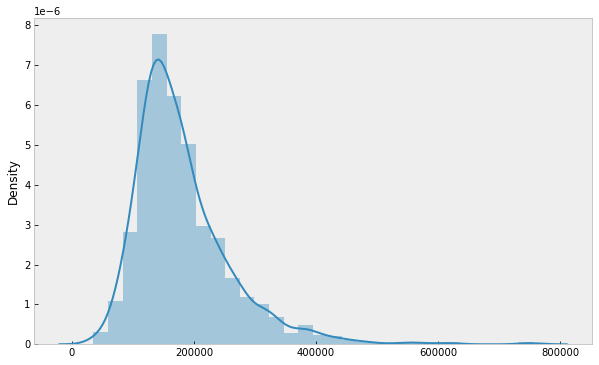

In [19]:
plt.figure(figsize = (10,6))
sns.distplot(Y, bins=30)

Normality assumption of target variable is satisfied. Distribution is right skewed with potentially some outlier to the right

## Determine any correlations between:
(i) Independent variables themselves

(ii) Independent variables and dependent variable

<AxesSubplot:>

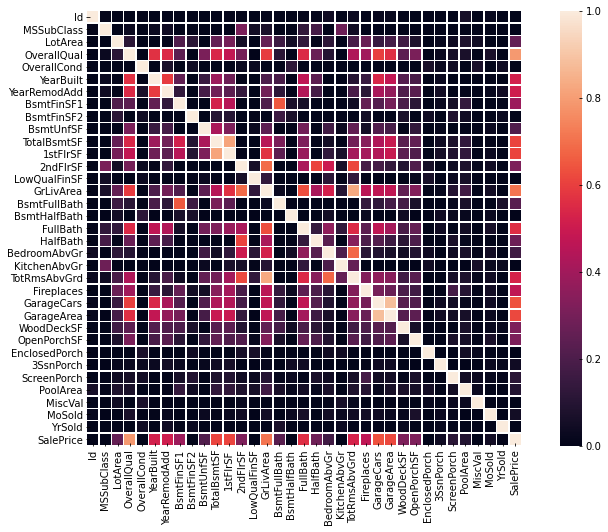

In [20]:
plt.figure(figsize = (14,8))
corr_matrix = df_train.corr().round(2)
sns.heatmap(data=corr_matrix, linewidths=0.5, vmin = 0, vmax = 1, square = True)

A few significant correlations between independent variables, such as:
- TotalBsmtSF and 1stFlrSF
- GrLivArea and TotRmsAbvGrd
- GarageCars and GarageArea

A few significant correlations between dependent variable and independent variables, such as:
- SalePrice and OverallQual
- SalePrice and TotalBsmtSF
- SalePrice and 1stFlrSF
- SalePrice and GrLivArea
- SalePrice and GarageCars
- SalePrice and GarageArea

Text(0, 0.5, 'SalePrice')

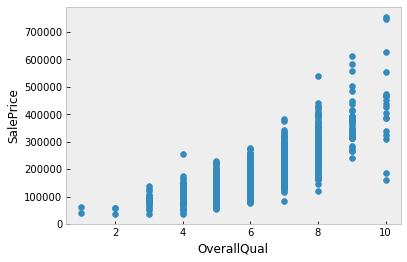

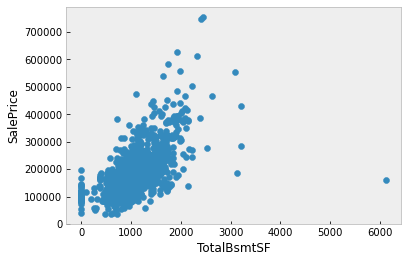

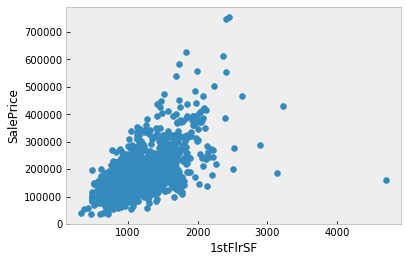

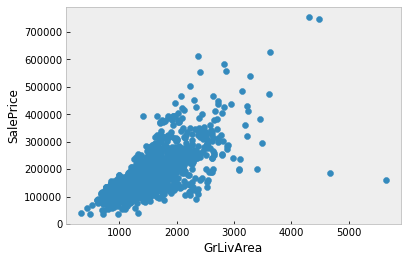

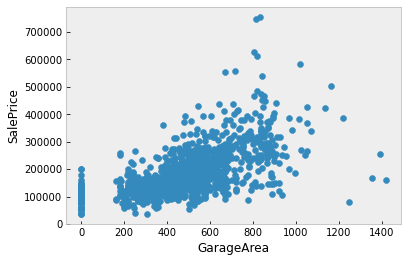

In [21]:
# Scatter plot to observe the correlations between features highly correlated with SalePrice:

plot1 = plt.figure(1)
plt.scatter(df_train['OverallQual'], Y)
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

# As OverallQual goes up, SalePrice tends to go up
plot2 = plt.figure(2)
plt.scatter(df_train['TotalBsmtSF'], Y)
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")

# As TotalBsmtSF goes up, SalePrice tends to go up
plot3 = plt.figure(3)
plt.scatter(df_train['1stFlrSF'], Y)
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")

# As 1stFlrSF goes up, SalePrice tends to go up

plot4 = plt.figure(4)
plt.scatter(df_train['GrLivArea'], Y)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")


# As GrLivArea goes up, SalePrice tends to go up

plot5 = plt.figure(5)
plt.scatter(df_train['GarageArea'], Y)
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(preprocessed_X, Y, test_size = 0.3, random_state = 32)

In [23]:
Y_train = Y_train.values.ravel()

array([1, 1, 0, ..., 0, 0, 1])

In [24]:
Y_test = Y_test.values.ravel()

## Converting Y_train and Y_test into binary variables

In [25]:
train_median = np.median(Y_train)
test_median = np.median(Y_test)

In [26]:
Y_train = [1 if y > train_median else 0 for y in Y_train]
Y_test = [1 if y > test_median else 0 for y in Y_test]

In [27]:
Y_train

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,


In [28]:
rf_classifier = RandomForestClassifier(oob_score = True)

In [29]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(oob_score=True)

In [30]:
rf_classifier.score(X_test, Y_test)

0.910958904109589

In [31]:
preprocessed_X.shape

(1460, 78)

In [32]:
rf_classifier.oob_score_

0.9197651663405088

# Hyperparameter Tuning

In [33]:
n_estimators = [int(x) for x in range(100, 700, 100)] # This is how many decision trees to generate
max_features = [0.2, 0.4, 0.6, 0.8, 1]
max_samples = [0.2, 0.4, 0.6, 0.8, 1]
criterion = ['gini', 'entropy']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {"n_estimators": n_estimators,
"max_features": max_features,
"max_samples": max_samples,
"criterion": criterion,
"min_samples_leaf": min_samples_leaf,
"bootstrap": bootstrap}


In [34]:
#rf_grid = GridSearchCV(estimator = rf_classifier, param_grid=random_grid, cv = 10, verbose = 2)
#rf_grid.fit(X_train, Y_train)
#rf.grid.best_params_

In [35]:
rf_random = RandomizedSearchCV(estimator=rf_classifier, param_distributions=random_grid, cv = 3, verbose=2, random_state=42, n_jobs=None)
rf_random.fit(X_train, Y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=500, min_samples_leaf=2, max_samples=0.6, max_features=0.6, criterion=gini, bootstrap=False 
[CV]  n_estimators=500, min_samples_leaf=2, max_samples=0.6, max_features=0.6, criterion=gini, bootstrap=False, total=   0.0s
[CV] n_estimators=500, min_samples_leaf=2, max_samples=0.6, max_features=0.6, criterion=gini, bootstrap=False 
[CV]  n_estimators=500, min_samples_leaf=2, max_samples=0.6, max_features=0.6, criterion=gini, bootstrap=False, total=   0.0s
[CV] n_estimators=500, min_samples_leaf=2, max_samples=0.6, max_features=0.6, criterion=gini, bootstrap=False 
[CV]  n_estimators=500, min_samples_leaf=2, max_samples=0.6, max_features=0.6, criterion=gini, bootstrap=False, total=   0.0s
[CV] n_estimators=200, min_samples_leaf=1, max_samples=0.4, max_features=0.4, criterion=entropy, bootstrap=False 
[CV]  n_estimators=200, min_samples_leaf=1, max_samples=0.4, max_features=0.4, criterion=entropy, bootstrap=False,

{'n_estimators': 300,
 'min_samples_leaf': 4,
 'max_samples': 0.6,
 'max_features': 1,
 'criterion': 'entropy',
 'bootstrap': True}

In [36]:
rf_random.best_score_

0.9129032258064517

In [37]:
rf_classifier = RandomForestClassifier(**rf_random.best_params_, oob_score=True)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_features=1, max_samples=0.6,
                       min_samples_leaf=4, n_estimators=300, oob_score=True)

In [38]:
print("Final Score: {}".format(rf_classifier.score(X_test, Y_test)))
print("Final cross validation score: {}".format(rf_classifier.oob_score_))

Final Score: 0.91324200913242
Final cross validation score: 0.9197651663405088


### Max depth of Random Forest Classifier

In [39]:
tree_max_depths = [estimator.tree_.max_depth for estimator in rf_classifier.estimators_]
rf_max_depths = np.mean(tree_max_depths)

In [40]:
rf_max_depths

9.64

In [41]:
y_pred = rf_classifier.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[200,  19],
       [ 19, 200]], dtype=int64)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       219
           1       0.91      0.91      0.91       219

    accuracy                           0.91       438
   macro avg       0.91      0.91      0.91       438
weighted avg       0.91      0.91      0.91       438



# Feature Importance

Here I am using permutation importance, since it is not sensible to the relationship between the feature and the target (i.e if a feature is 90% responsible for classification of 5% of the variables it still may not be a significantly important feature), thus the drop in model score is indicative of how much the model depends on the feature

In [44]:
rf_classifier.score(X_test, Y_test)

0.91324200913242

In [45]:
from sklearn.inspection import permutation_importance
results = permutation_importance(rf_classifier, X_test, Y_test, scoring = "accuracy", n_repeats = 100, random_state = 32)

In [46]:
# Verify function gives mean importance for all features
len(results.importances_mean)
importance = results.importances_mean

In [47]:
len(results.importances_mean)

78

In [48]:
from libraries.helpers import imp_df, var_imp_plot

In [50]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

In [51]:
imp_df = imp_df(X.columns, importance)

In [52]:
imp_df.head()

,feature,feature_importance
0,GrLivArea,0.010228
1,FullBath,0.008402
2,2ndFlrSF,0.004429
3,TotalBsmtSF,0.004247
4,YearRemodAdd,0.004132


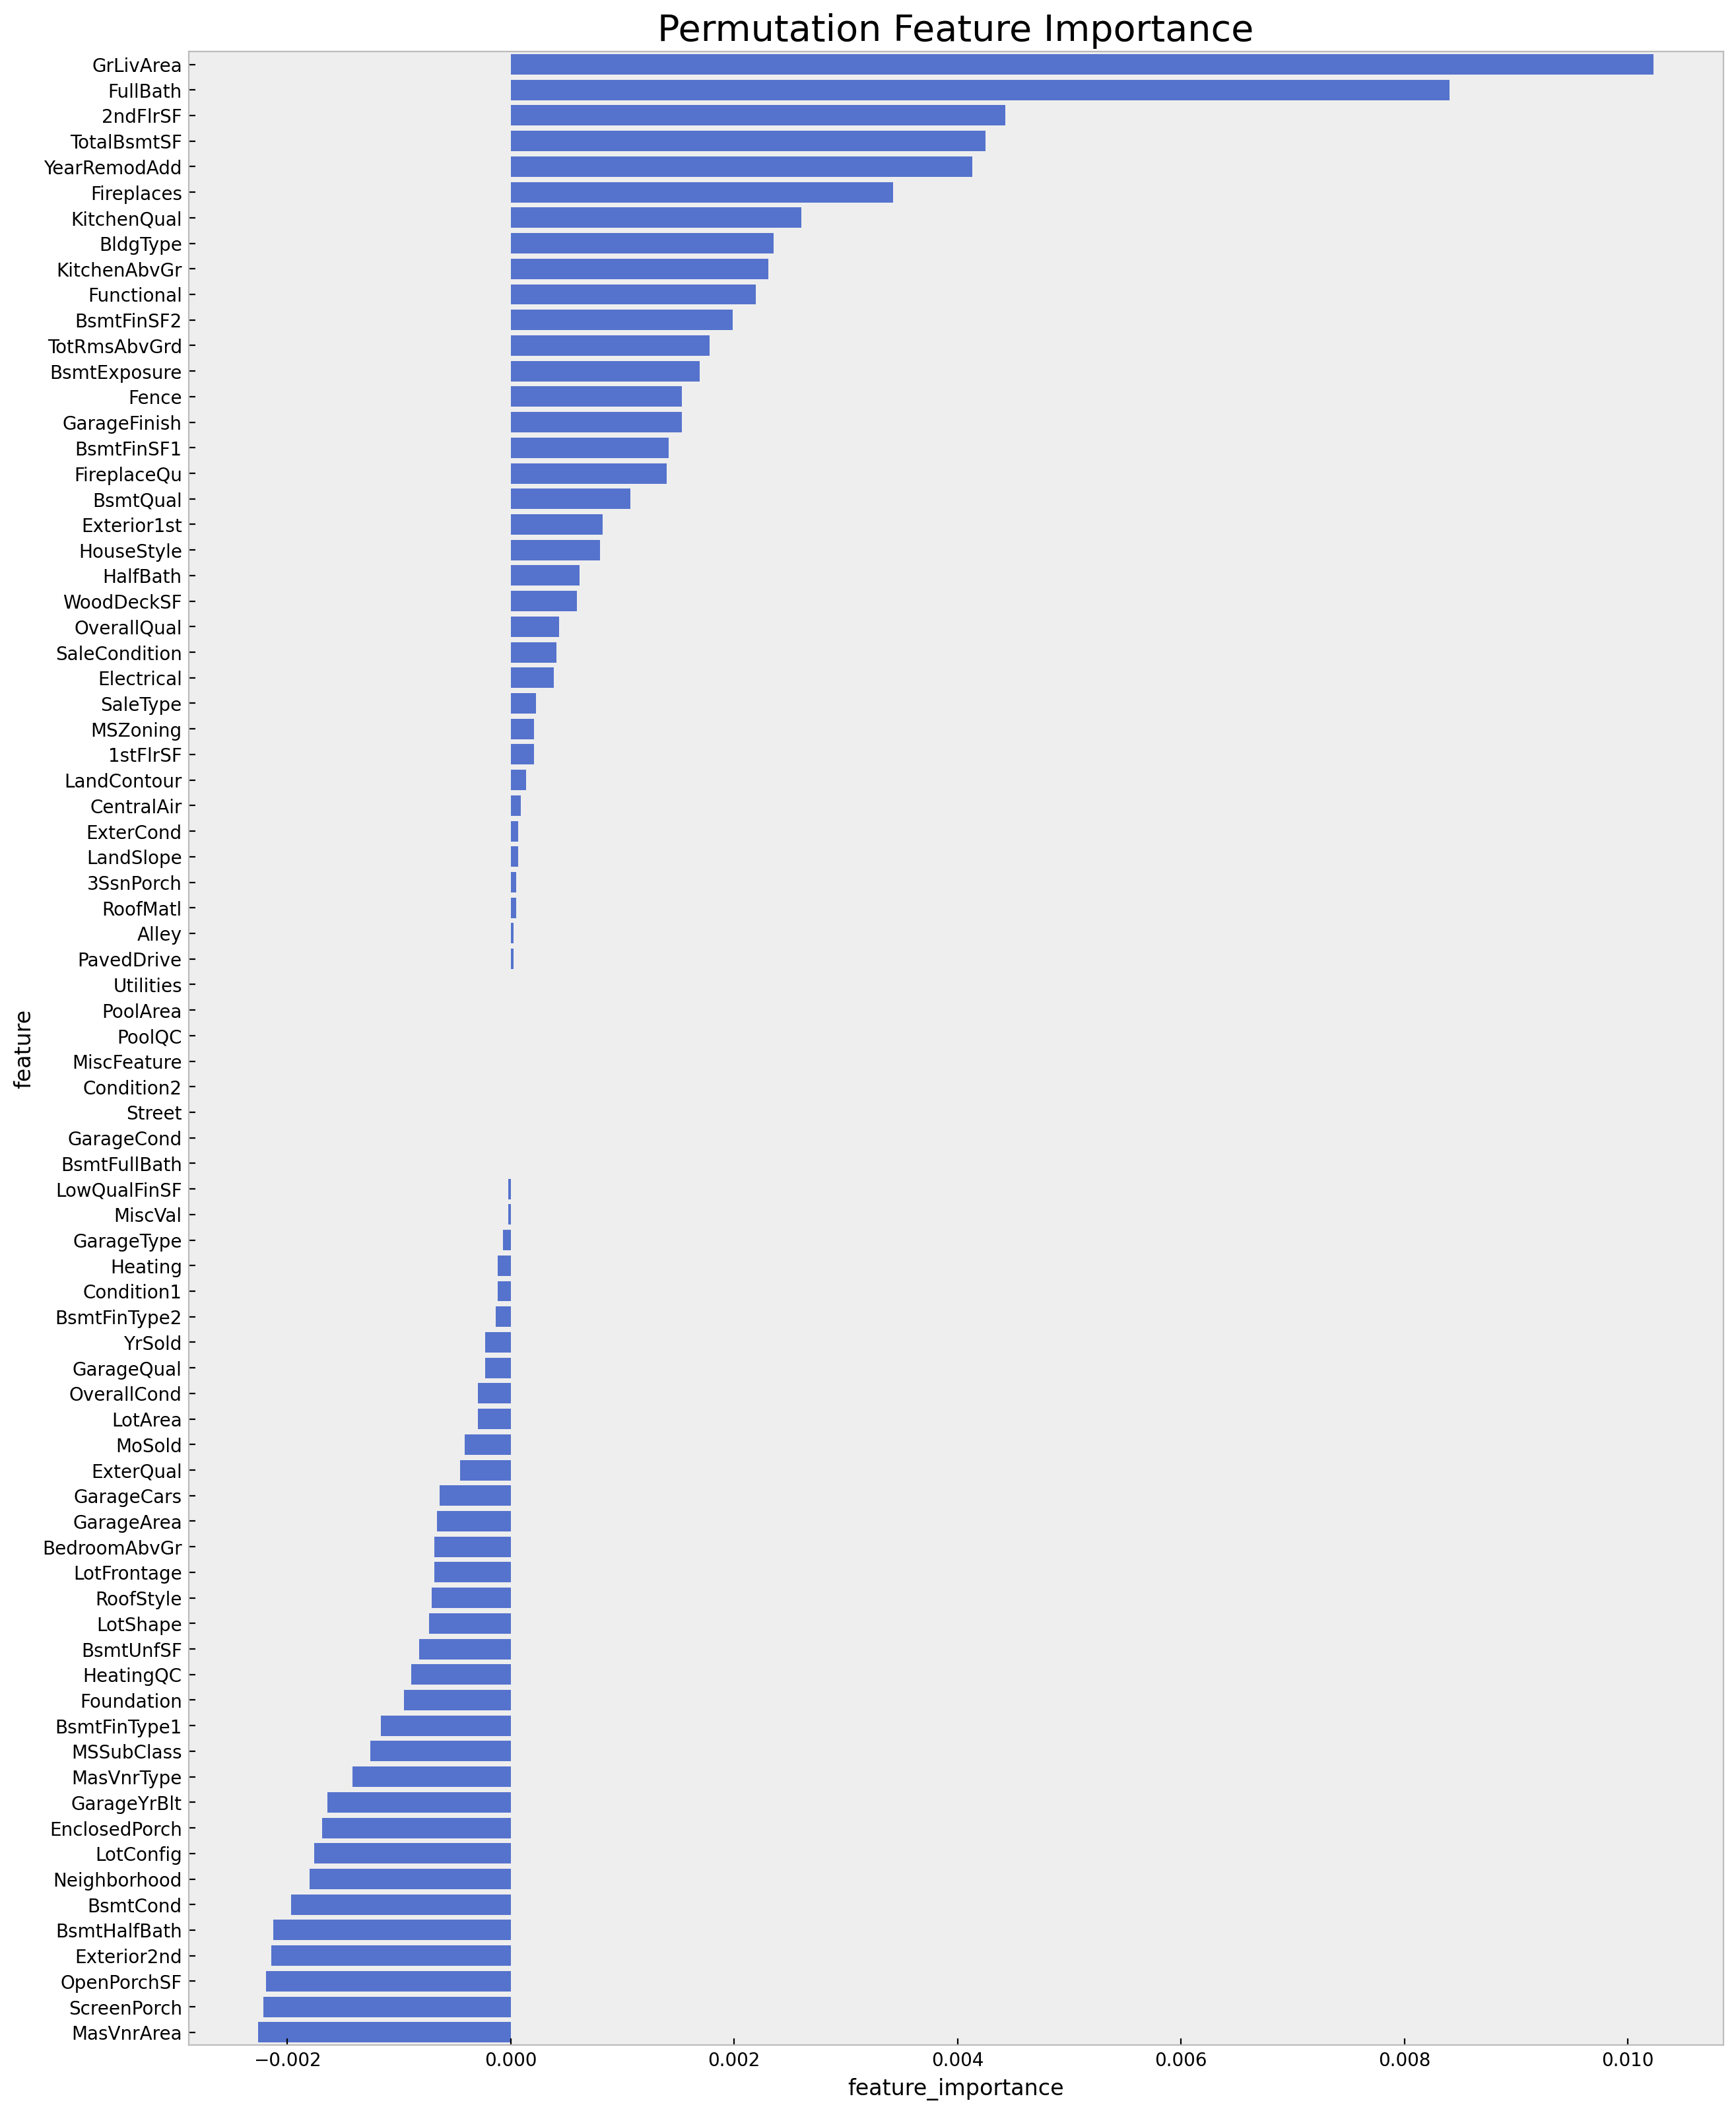

In [53]:
plt.figure(figsize=(15, 20), dpi=200)
var_imp_plot(imp_df, "Permutation Feature Importance")
plt.show()

In [54]:
selected_features_id = [index for index, importance in enumerate(importance) if importance > 0]

In [55]:
selected_cols = [X.columns[ind] for ind in selected_features_id]

In [56]:
len(selected_cols)

36

# Retrain Random Forest Classification model on important selected features

## Baseline Model

In [57]:
_y_train_base = Y_train
_y_test_base = Y_test

In [58]:
rf = RandomForestClassifier()
rf.fit(X_train, _y_train_base)

print("BASE MODEL SCORE: {}".format(rf.score(X_test, _y_test_base)))

BASE MODEL SCORE: 0.9178082191780822


## New model trained on selected features

In [59]:
X_train[1]

array([ 0.        ,  0.        ,  2.        ,  0.        ,  3.        ,
        1.        ,  3.        ,  6.        ,  6.        ,  2.        ,
        8.        ,  3.        ,  0.        , 13.        , 15.        ,
        2.        ,  4.        ,  0.        ,  3.        ,  4.        ,
        1.        , 10.        ,  1.        ,  4.        ,  4.        ,
        1.        ,  1.        ,  3.        ,  3.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  4.        ,  5.        ,
        2.        ,  6.        ,  2.        ,  1.        ,  1.        ,
        3.        ,  4.        ,  2.        ,  4.        ,  4.        ,
        4.        ,  6.        ,  1.        ,  0.        ,  1.        ,
        2.        ,  2.        ,  5.        ,  6.        ,  5.        ,
        5.        ,  1.        ,  3.        ,  0.27073032,  0.36971538,
       -0.77441804, -0.57441047, -0.97301818, -0.28865283, -0.90394455,
        1.17925266, -0.70448325,  0.96640944, -0.27020835, -0.06

In [60]:
original_cols = X.columns
sorted_selected_columns = [a for a in original_cols if a in selected_cols]
sorted_selected_columns_indexes = [original_cols.get_loc(col) for col in X.columns if col in selected_cols]


In [61]:
sorted_selected_columns

['FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'SaleType',
 'MSZoning',
 'Exterior1st',
 'Electrical',
 '3SsnPorch',
 'Fence',
 'SaleCondition',
 'Alley',
 'LandContour',
 'LandSlope',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'RoofMatl',
 'ExterCond',
 'BsmtQual',
 'BsmtExposure',
 'CentralAir',
 'PavedDrive',
 'FireplaceQu',
 'Fireplaces',
 'GarageFinish',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'WoodDeckSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'YearRemodAdd']

In [62]:
selected_features_train = X_train[:, sorted_selected_columns_indexes]
selected_features_test = X_test[:, sorted_selected_columns_indexes]

In [63]:
rf_selected_feats = RandomForestClassifier(oob_score=True)
rf_selected_feats.fit(selected_features_train, _y_train_base)
print("SELECTED FEATURES MODEL SCORE: {}".format(rf_selected_feats.score(selected_features_test, _y_test_base)))

SELECTED FEATURES MODEL SCORE: 0.910958904109589


In [64]:
print("SELECTED FEATURES CV SCORE: {}".format(rf_selected_feats.oob_score_))

SELECTED FEATURES CV SCORE: 0.9099804305283757


# Multidimensional Scaling (MDS):

In [65]:
from sklearn.manifold import MDS

In [63]:
from libraries.helpers import proximityMatrix

In [66]:
def proximityMatrix(model, X, normalize=True):      

    terminals = model.apply(X)
    nTrees = terminals.shape[1]

    a = terminals[:,0]
    proxMat = 1*np.equal.outer(a, a)

    for i in range(1, nTrees):
        a = terminals[:,i]
        proxMat += 1*np.equal.outer(a, a)

    if normalize:
        proxMat = proxMat / nTrees

    return proxMat   

In [67]:
proximity_matrix = proximityMatrix(rf_selected_feats, selected_features_train, normalize = True)

In [68]:
embedding = MDS(n_components = 3, random_state=0)

In [66]:
positions_in_embedding_space = embedding.fit(proximity_matrix)

In [69]:
mds_coords = embedding.fit_transform(proximity_matrix)

In [70]:
x_arr = mds_coords[:,0]
y_arr = mds_coords[:,1]
z_arr = mds_coords[:,2]


In [71]:
from matplotlib import cm

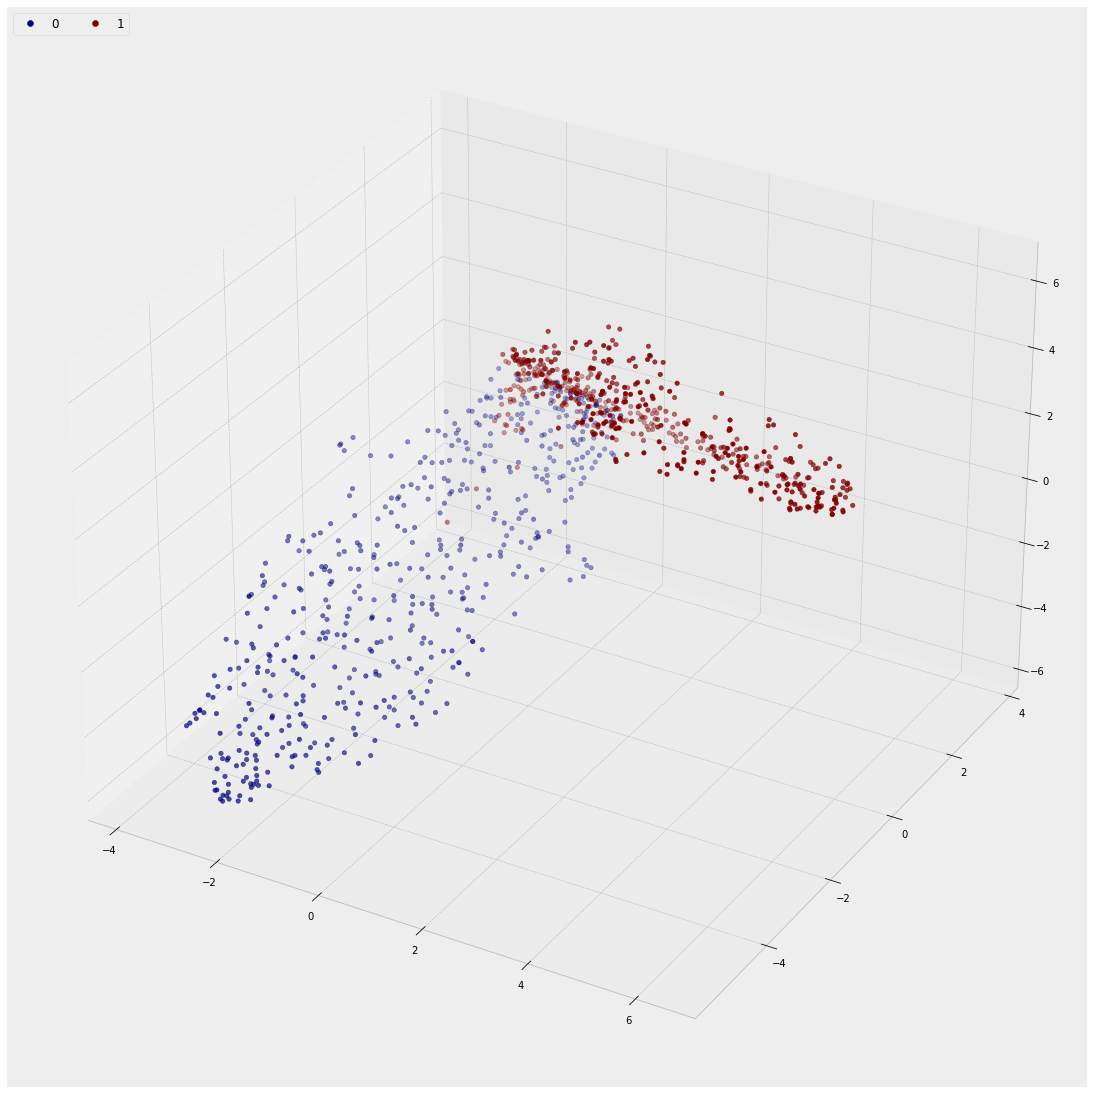

In [73]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15, 15))
ax = Axes3D(fig)

scatter = ax.scatter(x_arr, y_arr, z_arr, c = _y_train_base, marker = "o", cmap = cm.jet)
classes = [0, 1]
plt.legend(loc = 2, ncol = 2, prop = {"size":12}, handles = scatter.legend_elements()[0], labels = classes)
plt.show()

# Feature Tweaky

Extracting points in selected_features_train whose target == -1 (negative features)

In [74]:
_y_train_base

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,


In [72]:
selected_features_train[0].reshape(1, -1)[0]

array([ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,  2.00000000e+00,
        1.00000000e+00,  2.00000000e+00,  4.00000000e+00,  2.00000000e+00,
        2.00000000e+00,  8.00000000e+00,  3.00000000e+00,  9.00000000e+00,
        4.00000000e+00,  4.00000000e+00,  1.00000000e+00,  2.00000000e+00,
        4.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.00000000e+00,
        0.00000000e+00,  2.00000000e+00,  3.00000000e+00,  5.00000000e+00,
        4.00000000e+00,  2.00000000e+00,  0.00000000e+00,  3.00000000e+00,
        4.00000000e+00,  1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        1.00000000e+00,  6.00000000e+00,  2.00000000e+00,  0.00000000e+00,
       -1.02167062e+00,  2.62103783e-01,  6.45464462e-16, -5.74410469e-01,
        1.47466228e+00, -2.88652831e-01,  6.99046888e-01,  1.03559269e+00,
        1.36396164e+00, -3.59324900e-01, -2.70208354e-01,  4.28050017e+00,
       -7.22728396e-01,  

In [75]:
neg_vals = []
# Select points correctly labelled as having low house prices
for index, row in enumerate(selected_features_train):
    print(index, row)
    if _y_train_base[index] == 0 and rf_selected_feats.predict(selected_features_train[index].reshape(1, -1))[0] == _y_train_base[index]:
        neg_vals.append(row)




0 [ 1.          0.          1.          3.          4.          6.
  8.          3.         13.          4.          0.          4.
  4.          1.          3.          0.          0.          2.
  4.          1.          4.          4.          4.          1.
  2.          3.          0.          3.          1.0053042  -0.28865283
  0.09250959 -0.75217584 -0.16722945 -0.79516323 -0.79471423 -1.4471009 ]
1 [ 2.          0.          1.          3.          6.          6.
  8.          3.         13.          4.          0.          4.
  4.          1.          3.          0.          0.          0.
  4.          1.          4.          4.          4.          1.
  2.          2.          1.          3.         -0.97301818 -0.28865283
 -0.90394455  1.17925266 -1.29801993  0.55458118 -0.50535599  0.87866809]
2 [ 1.          0.          1.          2.          4.          6.
  8.          4.          8.          4.          0.          1.
  4.          1.          3.          0.          

In [76]:
len(neg_vals)

512

In [77]:
class_labels = [0,1]
aim_label = 1
epsilon = 0.1

In [78]:
selected_cols_map = {col: 1 for col in sorted_selected_columns}

In [79]:
selected_cols_map

{'FullBath': 1,
 'HalfBath': 1,
 'KitchenAbvGr': 1,
 'KitchenQual': 1,
 'TotRmsAbvGrd': 1,
 'Functional': 1,
 'SaleType': 1,
 'MSZoning': 1,
 'Exterior1st': 1,
 'Electrical': 1,
 '3SsnPorch': 1,
 'Fence': 1,
 'SaleCondition': 1,
 'Alley': 1,
 'LandContour': 1,
 'LandSlope': 1,
 'BldgType': 1,
 'HouseStyle': 1,
 'OverallQual': 1,
 'RoofMatl': 1,
 'ExterCond': 1,
 'BsmtQual': 1,
 'BsmtExposure': 1,
 'CentralAir': 1,
 'PavedDrive': 1,
 'FireplaceQu': 1,
 'Fireplaces': 1,
 'GarageFinish': 1,
 'BsmtFinSF1': 1,
 'BsmtFinSF2': 1,
 'TotalBsmtSF': 1,
 'WoodDeckSF': 1,
 '1stFlrSF': 1,
 '2ndFlrSF': 1,
 'GrLivArea': 1,
 'YearRemodAdd': 1}

In [80]:
def cost_func(a, b):
    diff = a - b
    weighted_cost = np.multiply(diff, list(selected_cols_map.values()))
    return np.linalg.norm(weighted_cost)

In [81]:
from libraries.featureTweakPy import feature_tweaking_ensemble, feature_tweaking_ensemble_loop, feature_tweaking_estimator

In [88]:
feature_tweaky_ensemble_info = []
for index, instance in enumerate(neg_vals):
    #print("index: {}".format(index))
    #print("instance: {}".format(instance))
    array_for_pred = instance.reshape(1, -1)
    before_pred = rf_selected_feats.predict(array_for_pred)[0]
    #print("prediction {}".format(before_pred))
    if before_pred == 1:
        continue # sanity check to completely exclude positively labelled instances
    new_feature_vector = feature_tweaking_ensemble(rf_selected_feats, instance, class_labels, aim_label, epsilon, cost_func)
    after_pred = rf_selected_feats.predict(new_feature_vector.reshape(1, -1))[0]
    iteration = 1

    feature_tweaky_ensemble_info.append({"index": index, "pred_before_ft": before_pred, "pred_after_ft": after_pred, "iterations": iteration, "num_features_changed": len([1 for f1, f2 in zip(instance, new_feature_vector) if f1 != f2])})

    if len(feature_tweaky_ensemble_info) == 256: # Takes 50% of data since it's very slow
        break

KeyboardInterrupt: 

In [84]:
import eli5

In [89]:
feature_tweaky_ensemble_info

[{'index': 0,
  'pred_before_ft': 0,
  'pred_after_ft': 1,
  'iterations': 1,
  'num_features_changed': 9},
 {'index': 1,
  'pred_before_ft': 0,
  'pred_after_ft': 1,
  'iterations': 1,
  'num_features_changed': 6},
 {'index': 2,
  'pred_before_ft': 0,
  'pred_after_ft': 1,
  'iterations': 1,
  'num_features_changed': 11},
 {'index': 3,
  'pred_before_ft': 0,
  'pred_after_ft': 0,
  'iterations': 1,
  'num_features_changed': 0},
 {'index': 4,
  'pred_before_ft': 0,
  'pred_after_ft': 1,
  'iterations': 1,
  'num_features_changed': 9},
 {'index': 5,
  'pred_before_ft': 0,
  'pred_after_ft': 1,
  'iterations': 1,
  'num_features_changed': 12},
 {'index': 6,
  'pred_before_ft': 0,
  'pred_after_ft': 1,
  'iterations': 1,
  'num_features_changed': 7},
 {'index': 7,
  'pred_before_ft': 0,
  'pred_after_ft': 1,
  'iterations': 1,
  'num_features_changed': 8},
 {'index': 8,
  'pred_before_ft': 0,
  'pred_after_ft': 1,
  'iterations': 1,
  'num_features_changed': 5},
 {'index': 9,
  'pred_befo

In [90]:
changed_instances = [feature for feature in feature_tweaky_ensemble_info if feature["pred_after_ft"] == 1]

In [101]:
avg_steps_to_converge = np.mean([x["num_features_changed"] for x in changed_instances])
max_steps_converge = max([x["num_features_changed"] for x in changed_instances])
min_steps_converge = min([x["num_features_changed"] for x in changed_instances])

In [102]:
print(avg_steps_to_converge)
print(max_steps_converge)
print(min_steps_converge)

6.9375
13
1


In [91]:
len(changed_instances)

48

In [92]:
len(feature_tweaky_ensemble_info)

51

## Visualise converging (positive output features after FT) vs non-converging (still negative after FT) points

In [98]:
rf_selected_feats.predict(neg_vals[changed_instances[0]["index"]].reshape(1,-1))[0]

0